In [65]:
import os
import sys
import pandas as pd
import numpy as np
import random
import warnings

In [66]:
os.chdir("H:\\Dropbox\\unsupervised")

In [67]:
df = pd.read_csv("ecoli.csv",header=None)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8
0,﻿AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [69]:
X = df.drop(df.columns[0],axis=1)
X = X.drop(X.columns[7],axis=1)
Y = df.iloc[:,8].astype('category').cat.codes


In [70]:
Y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [71]:
class kmeansPlusPlus:
    import numpy as np
    import pandas as pd
    
    def __init__(self,x):
        self.X=None
        self.k=None
        self.centroidList = []
        self.clusterAssignments = []
        self.maxValue = None
        self.minValue = None
        self.validCentroids = False
        self.oldCentroids = []

          
    def distanceBetween2Points(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))  
        
    def meanOfListOfPoints(self,vecArray):
        return np.mean(vecArray,axis=0)
    

    def initPlusPlus(self):
        kppCentroids = []
        x =self.X.drop(["Class"],axis=1)
     
        #Assign First Center
        r = int(np.random.uniform(0,len(x)))
        firstC=np.array(x.iloc[[r]])
        self.centroidList.append(firstC)
        
        kAssigned = 1
        
        while kAssigned < self.k:
            #For EAch point , compute its distance squared to the nearest center
            probWeights = []
            for i in range(0,len(x)):
                row = np.array(x.iloc[[i]])
                nearestCentroidIndex = self.getIndexOfNearestCentroid(row)
                probWeights.append((self.distanceBetween2Points(row,self.centroidList[nearestCentroidIndex]))**2)
            probWeightsSum = np.sum(probWeights)
            probWeights = probWeights/probWeightsSum
            chosenPoint = np.random.choice(len(x),1,p=np.reshape(probWeights,len(probWeights)))
            self.centroidList.append(np.array(x.iloc[[int(chosenPoint)]]))
            kAssigned=kAssigned+1
        print(str(len(self.centroidList)))    
        print("Centroids Generated Are: "+str(self.centroidList))
        

    def getIndexOfNearestCentroid(self,point):
        centroidIndex = 0

        for i in range( 0, (len(self.centroidList)) ):
            if self.distanceBetween2Points(point,np.array(self.centroidList[i])) < self.distanceBetween2Points(point,np.array(self.centroidList[centroidIndex])):
                centroidIndex=i
        return centroidIndex
    
    
    def assignPointsToClusters(self):
        X=self.X
        for i in range(0,int(len(X))):
            row = np.array(self.X.iloc[[i]].drop(["Class"],axis=1))
#             print("Assigning "+str(i)+" of "+str(len(X))+" its Class is: "+str(self.getIndexOfNearestCentroid(row)))
            self.X.set_value(i,'Class',self.getIndexOfNearestCentroid(row))
            
    def assignNewPointsToClusters(self,newX):
        assignments = []
        for i in range(0,len(newX)):
            row = np.array(newX.iloc[[i]])   
            assignments.append.getIndexOfNearestCentroid(row)
        return assignments
            
    def updateCentroids(self):
        lenSelfCentroids = len(self.centroidList)
        for i in range(0,lenSelfCentroids):
            pointsinclass = []
            subset =self.X[self.X['Class'] == i ]
#             print("Length of subset is "+str(len(subset)))
            subset = subset.drop(["Class"],axis=1)
            if len(subset)<2:
                print("Subset Too Small!!!!")
                continue
            for j in range(0,len(subset)):
                pointsinclass.append(subset.iloc[j])
#             print("Points in class are : "+str(pointsinclass))    
            self.centroidList[i] = self.meanOfListOfPoints(pointsinclass)    
        
    def train(self,x,k):
        print("Initializing....")
        self.k=k
        self.X=x
        self.centroidList = []
        self.clusterAssignments = []
        self.X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
        self.X['Class'] = 99999

        print("Checking For Nans....")
        nanCount = self.X.isnull().sum().sum()
        if nanCount > 0:
             print("Warning: Nan's Detected")
             print("Dropping Rows with Nans")
             self.X = self.X.dropna(axis=0)
             print("Size of Dataset is Now: "+str(len(self.X)))
         
        print("Generating Centroid List with Kmeans++")
        self.initPlusPlus()
        print("Generated Centroids are: "+str(self.centroidList))
        self.assignPointsToClusters()
        
        for i in range(0,500):
            self.oldCentroids = self.centroidList.copy()
            print("Old Centroids are: "+str(self.oldCentroids))
            self.assignPointsToClusters()
            self.updateCentroids()
            self.assignPointsToClusters()
            print("New Centroids are: "+str(self.centroidList))
            
            if np.array_equal(self.centroidList,self.oldCentroids):
                print("model converged")
                break
            
    def predict(self,newX):
        newX.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
        return assignNewPointsToClusters(newX)
        
            
    
    

In [72]:
test = kmeans(X)

In [73]:
test = kmeans(X)


In [80]:
test.train(X,8)

Initializing....
Checking For Nans....
Generating Centroid List with Kmeans++
8
Centroids Generated Are: [array([[ 0.32,  0.39,  0.48,  0.5 ,  0.53,  0.28,  0.38]]), array([[ 0.81,  0.52,  0.48,  0.5 ,  0.57,  0.78,  0.8 ]]), array([[ 0.39,  0.41,  0.48,  0.5 ,  0.52,  0.72,  0.75]]), array([[ 0.72,  0.86,  0.48,  0.5 ,  0.17,  0.55,  0.21]]), array([[ 0.75,  0.76,  0.48,  0.5 ,  0.83,  0.57,  0.3 ]]), array([[ 0.69,  0.66,  0.48,  0.5 ,  0.41,  0.5 ,  0.25]]), array([[ 0.66,  0.49,  1.  ,  0.5 ,  0.54,  0.56,  0.36]]), array([[ 0.63,  0.47,  0.48,  0.5 ,  0.51,  0.82,  0.84]])]
Generated Centroids are: [array([[ 0.32,  0.39,  0.48,  0.5 ,  0.53,  0.28,  0.38]]), array([[ 0.81,  0.52,  0.48,  0.5 ,  0.57,  0.78,  0.8 ]]), array([[ 0.39,  0.41,  0.48,  0.5 ,  0.52,  0.72,  0.75]]), array([[ 0.72,  0.86,  0.48,  0.5 ,  0.17,  0.55,  0.21]]), array([[ 0.75,  0.76,  0.48,  0.5 ,  0.83,  0.57,  0.3 ]]), array([[ 0.69,  0.66,  0.48,  0.5 ,  0.41,  0.5 ,  0.25]]), array([[ 0.66,  0.49,  1.  ,

In [81]:
test.centroidList

[array([ 0.34440299,  0.40485075,  0.48      ,  0.5       ,  0.45410448,
         0.30641791,  0.38656716]),
 array([ 0.75512821,  0.4774359 ,  0.48      ,  0.5       ,  0.57948718,
         0.73435897,  0.73820513]),
 array([ 0.33425,  0.4685 ,  0.48   ,  0.5    ,  0.54925,  0.711  ,  0.719  ]),
 array([ 0.58428571,  0.55428571,  0.48      ,  0.5       ,  0.27571429,
         0.68142857,  0.25142857]),
 array([ 0.683 ,  0.706 ,  0.48  ,  0.5   ,  0.7355,  0.466 ,  0.299 ]),
 array([ 0.65888889,  0.68333333,  0.48      ,  0.5       ,  0.4312963 ,
         0.43666667,  0.37166667]),
 array([ 0.65888889,  0.55333333,  1.        ,  0.55555556,  0.55333333,
         0.59555556,  0.38555556]),
 array([ 0.59969697,  0.50030303,  0.49575758,  0.5       ,  0.53575758,
         0.81484848,  0.82666667])]

In [82]:
test.X["Class"]

0      0
1      0
2      0
3      5
4      0
5      5
6      0
7      0
8      2
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     2
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
306    5
307    5
308    5
309    5
310    5
311    5
312    5
313    5
314    7
315    5
316    5
317    5
318    5
319    5
320    5
321    5
322    5
323    5
324    5
325    0
326    5
327    5
328    5
329    4
330    2
331    3
332    5
333    5
334    5
335    5
Name: Class, dtype: int64

In [86]:
tab = pd.crosstab(index=test.X["Class"],  # Make a crosstab
                              columns="count") 

In [87]:
tab

col_0,count
Class,
0,134
1,39
2,40
3,7
4,20
5,54
6,9
7,33


In [88]:
tab = pd.crosstab(index=Y,columns="count") 
tab

col_0,count
row_0,
0,143
1,77
2,2
3,2
4,35
5,20
6,5
7,52


In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
% matplotlib inline

In [45]:
tetra = pd.read_table('Tetra.lrn', skiprows = 3, usecols= [1,2,3] )

In [46]:
tetra[:5] 

,C1,C2,C3
0,1.295428,0.050829,-0.385217
1,1.409178,-0.035191,-0.251980
2,1.096803,0.246365,-0.415011
3,1.463328,0.265354,-0.513488
4,1.603284,0.080577,-0.470257


In [47]:
tetraTest = kmeans(tetra)

In [56]:
tetraTest.train(tetra,3)

Initializing....
Checking For Nans....
Generating Centroid List with Kmeans++
3
Centroids Generated Are: [array([[ 1.215102, -0.759198, -0.258057]]), array([[-0.013149, -1.657534, -0.072407]]), array([[ 0.347731, -0.158504,  1.495167]])]
Generated Centroids are: [array([[ 1.215102, -0.759198, -0.258057]]), array([[-0.013149, -1.657534, -0.072407]]), array([[ 0.347731, -0.158504,  1.495167]])]
Old Centroids are: [array([[ 1.215102, -0.759198, -0.258057]]), array([[-0.013149, -1.657534, -0.072407]]), array([[ 0.347731, -0.158504,  1.495167]])]
New Centroids are: [array([ 0.95483713,  0.18068329, -0.51851066]), array([-0.56371672, -1.02479321, -0.4493501 ]), array([-0.13318453,  0.39233492,  0.82252516])]
Old Centroids are: [array([ 0.95483713,  0.18068329, -0.51851066]), array([-0.56371672, -1.02479321, -0.4493501 ]), array([-0.13318453,  0.39233492,  0.82252516])]
New Centroids are: [array([ 1.04334417,  0.14773024, -0.51488494]), array([-0.55219214, -1.02498927, -0.45997626]), array([-

In [57]:
tetraTest.X

,C1,C2,C3,Class
0,1.295428,0.050829,-0.385217,0
1,1.409178,-0.035191,-0.251980,0
2,1.096803,0.246365,-0.415011,0
3,1.463328,0.265354,-0.513488,0
4,1.603284,0.080577,-0.470257,0
5,1.001833,-0.083266,-0.681399,0
6,1.517445,0.286702,-0.547891,0
7,1.617901,-0.158504,-0.301126,0
8,1.083162,-0.371103,-0.358668,0
9,1.669991,0.086600,-0.280595,0


In [58]:
tetra.head()

,C1,C2,C3,Class
0,1.295428,0.050829,-0.385217,0
1,1.409178,-0.035191,-0.251980,0
2,1.096803,0.246365,-0.415011,0
3,1.463328,0.265354,-0.513488,0
4,1.603284,0.080577,-0.470257,0


In [59]:
len(tetra)

400

In [60]:
len(tetraTest.X)

400

In [61]:
tetraTest.X["Class"]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
370    2
371    2
372    2
373    2
374    2
375    2
376    2
377    2
378    2
379    2
380    2
381    2
382    2
383    2
384    2
385    2
386    2
387    2
388    2
389    2
390    2
391    2
392    2
393    2
394    2
395    2
396    2
397    2
398    2
399    2
Name: Class, dtype: int64

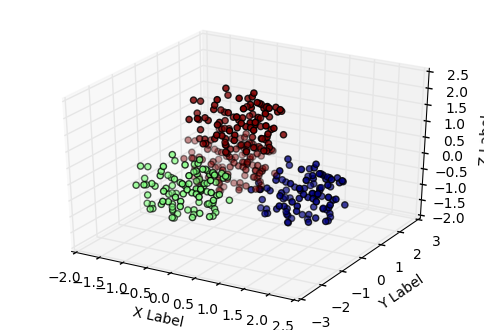

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = tetraTest.X["C1"]
Y = tetraTest.X["C2"]
Z = tetraTest.X["C3"]

current_labels = tetraTest.X["Class"]

ax.scatter(X ,Y, Z,  c=current_labels, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()